# Shared Fixture Pattern

**Problem:** Kosztowne tworzenie obiektów spowalnia testy.

**Rozwiązanie:** Współdzielenie niezmiennych danych między testami.

**Analogia:** Jak wspólna biblioteka - wszyscy mogą czytać, nikt nie niszczy książek.

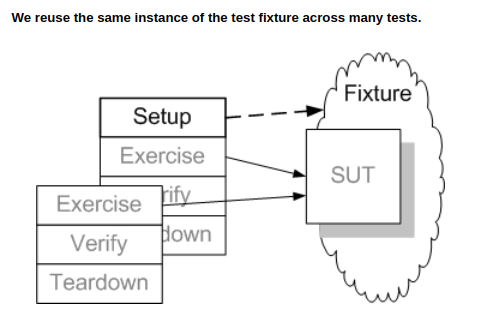

In [ ]:
class DatabaseConnection:
    def __init__(self):
        print("💰 Expensive DB connection created")
        self.data = {"user1": "John", "user2": "Jane"}
    
    def get_user(self, user_id):
        return self.data.get(user_id)

## ❌ Problematyczne: Tworzenie za każdym razem

In [ ]:
def test_get_user1():
    db = DatabaseConnection()  # Kosztowne!
    assert db.get_user("user1") == "John"

def test_get_user2():
    db = DatabaseConnection()  # Znów kosztowne!
    assert db.get_user("user2") == "Jane"

## ✅ Shared Fixture: Współdzielenie

In [ ]:
import pytest

@pytest.fixture(scope="session")  # Jedna instancja dla całej sesji
def shared_db():
    """Shared fixture - one instance for all tests"""
    return DatabaseConnection()  # Tworzone tylko raz!

def test_get_user1(shared_db):
    assert shared_db.get_user("user1") == "John"

def test_get_user2(shared_db):
    assert shared_db.get_user("user2") == "Jane"  # Ta sama instancja!

## ✅ Unittest: setUpClass dla Shared Fixture

In [ ]:
import unittest

class TestDatabase(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        """Shared fixture in unittest"""
        cls.db = DatabaseConnection()  # Jedna instancja dla całej klasy
    
    def test_get_user1(self):
        self.assertEqual(self.db.get_user("user1"), "John")
    
    def test_get_user2(self):
        self.assertEqual(self.db.get_user("user2"), "Jane")

## ⚠️ Uwaga: Tylko dla danych read-only!

In [ ]:
# BAD: Modifying shared data
def test_modify_shared(shared_db):
    shared_db.data["user1"] = "Modified"  # ❌ Wpłynie na inne testy!

# GOOD: Read-only access
def test_read_only(shared_db):
    user = shared_db.get_user("user1")  # ✅ Bezpieczne czytanie
    assert user == "John"

## Kiedy używać?

- **Kosztowne** obiekty (połączenia DB, pliki)
- **Tylko odczyt** - dane nie są modyfikowane
- **Wolne testy** przez tworzenie obiektów

**Zasada:** Współdziel tylko to, co nie zmienia się